<a href="https://colab.research.google.com/github/zdanielshi/personal_projects/blob/main/RELY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Install yfinance

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 956 kB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Import libraries

In [ ]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

Define the start and end times. Start time is March 22, 2022, the end of the RELY lockup. End date is coded to today.

# Relative returns since RELY lockup end

In [ ]:
start_date = '2022-03-22'
end_date = dt.date.today().strftime('%Y-%m-%d')

## Get returns for each comp

Define a function to get the return for each comp.

In [ ]:
def get_stock(ticker):
  stock = yf.Ticker(ticker)
  stock_close = stock.history(interval='1d', start=start_date, end=end_date)['Close']
  stock_close = stock_close.tolist()

  live_price = stock.info['regularMarketPrice']
  stock_close.append(int(live_price))

  stock_returns = [] # initialize a returns list
  for i in stock_close: # iterate through the close list
    stock_returns.append((i / stock_close[0]) - 1)# calculate each value against the 0 index value, append to the returns list
  return stock_returns

Run the function for comps and indices.

In [ ]:
rely_returns = get_stock('rely')
wise_returns = get_stock('wise.l')
pypl_returns = get_stock('pypl')
sq_returns = get_stock('sq')
coin_returns = get_stock('coin')
ml_returns = get_stock('ml')
dave_returns = get_stock('dave')
nu_returns = get_stock('nu')
flyw_returns = get_stock('flyw')
payo_returns = get_stock('payo')
tost_returns = get_stock('tost')
sofi_returns = get_stock('sofi')
dlo_returns = get_stock('dlo')
hood_returns = get_stock('hood')
upst_returns = get_stock('upst')
gdot_returns = get_stock('gdot')
wu_returns = get_stock('wu')
spy_returns = get_stock('spy')
nasdaq_100_returns = get_stock('^ndxt')


## Results

<function matplotlib.pyplot.show>

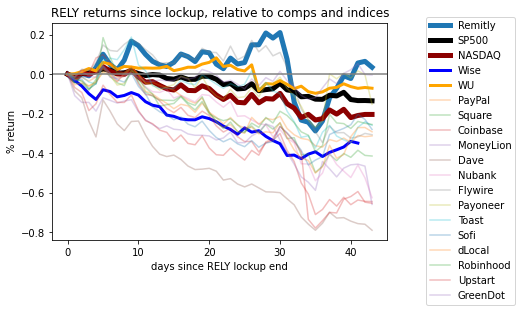

In [ ]:
plt.plot(rely_returns, lw=5, label='Remitly')
plt.plot(spy_returns, lw=5, color='black', label='SP500')
plt.plot(nasdaq_100_returns, lw=5, color='darkred', label='NASDAQ')
plt.plot(wise_returns, label='Wise', color='blue', lw=3)
plt.plot(wu_returns, label='WU', color='orange', lw=3)
plt.plot(pypl_returns, label='PayPal', alpha=.3)
plt.plot(sq_returns, label='Square', alpha=.3)
plt.plot(coin_returns, label='Coinbase', alpha=.3)
plt.plot(ml_returns, label='MoneyLion', alpha=.3)
plt.plot(dave_returns, label='Dave', alpha=.3)
plt.plot(nu_returns, label='Nubank', alpha=.3)
plt.plot(flyw_returns, label='Flywire', alpha=.3)
plt.plot(payo_returns, label='Payoneer', alpha=.3)
plt.plot(tost_returns, label='Toast', alpha=.3)
plt.plot(sofi_returns, label='Sofi', alpha=.3)
plt.plot(dlo_returns, label='dLocal', alpha=.3)
plt.plot(hood_returns, label='Robinhood', alpha=.3)
plt.plot(upst_returns, label='Upstart', alpha=.3)
plt.plot(gdot_returns, label='GreenDot', alpha=.3)


plt.title('RELY returns since lockup, relative to comps and indices')
plt.ylabel("% return")
plt.xlabel("days since RELY lockup end")
plt.axhline(y=0, color = 'gray')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show

In [ ]:
for i in rely_returns:
  print(str(round(i * 100, 2)) + "%")

<function matplotlib.pyplot.show>

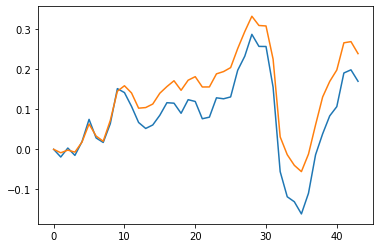

In [ ]:
rely_spy_relative = []
for i in range(len(rely_returns)):
  rely_spy_relative.append(rely_returns[i] - spy_returns[i])

plt.plot(rely_spy_relative)
plt.show

rely_nasdaq100_relative = []
for i in range(len(rely_returns)):
  rely_nasdaq100_relative.append(rely_returns[i] - nasdaq_100_returns[i])

plt.plot(rely_nasdaq100_relative)
plt.show